# Colab Quickstart

In [1]:
!git clone --recursive https://github.com/sapeirone/aml-2025-mistake-detection.git code

Cloning into 'code'...
remote: Enumerating objects: 437, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 437 (delta 5), reused 5 (delta 5), pack-reused 428 (from 1)
Receiving objects: 100% (437/437), 106.53 KiB | 5.33 MiB/s, done.
Resolving deltas: 100% (286/286), done.
Submodule 'annotations' (https://github.com/CaptainCook4D/annotations) registered for path 'annotations'
Cloning into '/content/code/annotations'...
remote: Enumerating objects: 152, done.        
remote: Counting objects: 100% (152/152), done.        
remote: Compressing objects: 100% (98/98), done.        
remote: Total 152 (delta 75), reused 108 (delta 46), pack-reused 0 (from 0)        
Receiving objects: 100% (152/152), 793.14 KiB | 8.09 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Submodule path 'annotations': checked out '0e9a108be2cbcbcbd592e7418c0ab9c16232d27a'


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# TODO: update the paths below with your own

!mkdir code/data
!unzip "/content/drive/MyDrive/AML/data/features/omnivore.zip" -d code/

!mkdir code/checkpoints
!unzip "/content/drive/MyDrive/AML/code/error_recognition_best.zip" -d code/checkpoints/

Archive:  /content/drive/MyDrive/AML/data/features/omnivore.zip
   creating: code/omnivore/
  inflating: code/omnivore/22_37_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/28_38_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/16_17_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/20_16_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/13_14_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/10_7_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/22_2_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/21_47_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/28_42_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/16_39_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/2_8_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/29_28_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/16_23_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/20_26_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/12_43_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/26_39_360p.mp4_1s_1s.npz  
  inflating: code/omnivore/20_39_360p.mp4_1s_1s.

In [4]:
!pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 9.2 MB/s eta 0:00:00


In [43]:
%%bash

cd code
python -m core.evaluate --variant MLP --backbone omnivore \
  --ckpt checkpoints/error_recognition_best/MLP/omnivore/error_recognition_MLP_omnivore_step_epoch_43.pt \
  --split step --threshold 0.6

Loaded annotations...... 
Loading recording ids from recordings_combined_splits.json
----------------------------------------------------------------
test Sub Step Level Metrics: {'precision': 0.4096162736939436, 'recall': 0.2989708115404083, 'f1': 0.3456549302643129, 'accuracy': 0.6831416629277163, 'auc': np.float64(0.6541560352028618), 'pr_auc': tensor(0.3187)}
test Step Level Metrics: {'precision': 0.6607142857142857, 'recall': 0.14859437751004015, 'f1': 0.24262295081967214, 'accuracy': 0.7105263157894737, 'auc': np.float64(0.7573902166041213), 'pr_auc': tensor(0.3638)}
----------------------------------------------------------------


bash: line 2: cd: code: No such file or directory
test Progress: 42347/798: 100%|██████████| 798/798 [00:04<00:00, 166.79it/s]


In [44]:
%%bash

cd code
python -m core.evaluate --split recordings --backbone omnivore --variant MLP \
  --ckpt checkpoints/error_recognition_best/MLP/omnivore/error_recognition_MLP_omnivore_recordings_epoch_33.pt \
  --threshold 0.4

Loaded annotations...... 
Loading recording ids from recordings_combined_splits.json
----------------------------------------------------------------
test Sub Step Level Metrics: {'precision': 0.3964945261528254, 'recall': 0.5688109780280797, 'f1': 0.46727266803505685, 'accuracy': 0.5735263432446531, 'auc': np.float64(0.5988330748775713), 'pr_auc': tensor(0.3673)}
test Step Level Metrics: {'precision': 0.4090909090909091, 'recall': 0.8589211618257261, 'f1': 0.5542168674698795, 'accuracy': 0.503725782414307, 'auc': np.float64(0.6302808067162018), 'pr_auc': tensor(0.4020)}
----------------------------------------------------------------


bash: line 2: cd: code: No such file or directory
test Progress: 38340/671: 100%|██████████| 671/671 [00:04<00:00, 164.31it/s]


In [45]:
%%bash

cd code
python -m core.evaluate --split step --backbone omnivore --variant Transformer \
  --ckpt checkpoints/error_recognition_best/Transformer/omnivore/error_recognition_Transformer_omnivore_step_epoch_9.pt \
  --threshold 0.6

Loaded annotations...... 
Loading recording ids from recordings_combined_splits.json
----------------------------------------------------------------
test Sub Step Level Metrics: {'precision': 0.4445452483556362, 'recall': 0.6613801248523705, 'f1': 0.5317056629365887, 'accuracy': 0.6738848088412402, 'auc': np.float64(0.7461755308526944), 'pr_auc': tensor(0.3888)}
test Step Level Metrics: {'precision': 0.5155709342560554, 'recall': 0.5983935742971888, 'f1': 0.5539033457249071, 'accuracy': 0.6992481203007519, 'auc': np.float64(0.7561832027563805), 'pr_auc': tensor(0.4338)}
----------------------------------------------------------------


bash: line 2: cd: code: No such file or directory
test Progress: 42347/798: 100%|██████████| 798/798 [00:05<00:00, 140.22it/s]


In [46]:
%%bash

cd code
python -m core.evaluate --split recordings --backbone omnivore --variant Transformer \
  --ckpt checkpoints/error_recognition_best/Transformer/omnivore/error_recognition_Transformer_omnivore_recordings_epoch_31.pt \
  --threshold 0.4

Loaded annotations...... 
Loading recording ids from recordings_combined_splits.json
----------------------------------------------------------------
test Sub Step Level Metrics: {'precision': 0.4491327720864185, 'recall': 0.35123344173871657, 'f1': 0.39419567346212053, 'accuracy': 0.645018257694314, 'auc': np.float64(0.6254427005929003), 'pr_auc': tensor(0.3711)}
test Step Level Metrics: {'precision': 0.45408163265306123, 'recall': 0.36929460580912865, 'f1': 0.4073226544622426, 'accuracy': 0.6140089418777943, 'auc': np.float64(0.6226768310334846), 'pr_auc': tensor(0.3942)}
----------------------------------------------------------------


bash: line 2: cd: code: No such file or directory
test Progress: 38340/671: 100%|██████████| 671/671 [00:05<00:00, 131.26it/s]


In [47]:
# Initialize annotations submodule if not already done
import os
os.chdir('/content/code')

# Check if annotations directory is empty
if not os.path.exists('annotations/annotation_json'):
    print("📦 Initializing annotations submodule...")
    !git submodule update --init --recursive
    print("✅ Annotations submodule initialized")
else:
    print("✅ Annotations already initialized")

# Verify the file exists
if os.path.exists('annotations/annotation_json/error_annotations.json'):
    print("✅ error_annotations.json found!")
else:
    print("❌ error_annotations.json still missing")

✅ Annotations already initialized
✅ error_annotations.json found!


ERROR TYPE DISTRIBUTION IN DATASET
Order Error         :  795 (30.9%)
Technique Error     :  502 (19.5%)
Preparation Error   :  410 (15.9%)
Measurement Error   :  331 (12.9%)
Missing Step        :  285 (11.1%)
Timing Error        :  177 (6.9%)
Temperature Error   :   66 (2.6%)
Other               :    8 (0.3%)
TOTAL               : 2574


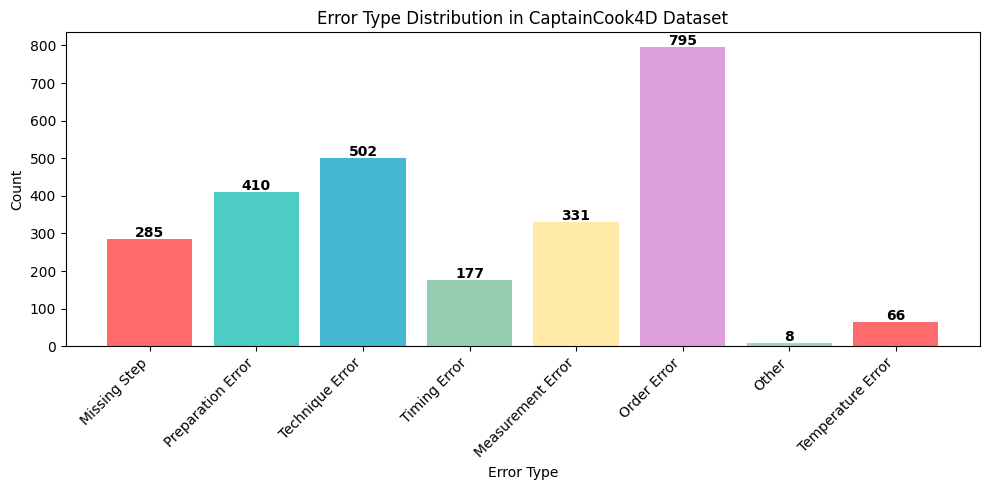

In [48]:
# ============================================================================
# CELL 13: Error Type Distribution Analysis
# ============================================================================
# Note: Run after teammate's cells 1-12 (setup and baseline evaluations)

import json
from collections import defaultdict
import matplotlib.pyplot as plt

# Load annotations
with open('annotations/annotation_json/error_annotations.json', 'r') as f:
    error_annotations = json.load(f)

# Count errors by type
error_counts = defaultdict(int)
for recording in error_annotations:
    for step in recording.get('step_annotations', []):
        for error in step.get('errors', []):
            error_counts[error.get('tag', 'Unknown')] += 1

# Display
print("=" * 60)
print("ERROR TYPE DISTRIBUTION IN DATASET")
print("=" * 60)
total = sum(error_counts.values())
for error_type, count in sorted(error_counts.items(), key=lambda x: -x[1]):
    print(f"{error_type:20s}: {count:4d} ({count/total*100:.1f}%)")
print(f"{'TOTAL':20s}: {total:4d}")

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']
bars = ax.bar(error_counts.keys(), error_counts.values(), color=colors[:len(error_counts)])
ax.set_ylabel('Count')
ax.set_xlabel('Error Type')
ax.set_title('Error Type Distribution in CaptainCook4D Dataset')
plt.xticks(rotation=45, ha='right')
for bar, count in zip(bars, error_counts.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, str(count), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('error_distribution.png', dpi=150)
plt.show()

In [49]:
# ============================================================================
# LIST ALL YOUR CHECKPOINTS
# ============================================================================

import os

print("📁 Checking checkpoint folders...\n")

# Check multiple possible locations
possible_locations = [
    "/content/code/checkpoints/error_recognition",
    "/content/code/checkpoints/error_recognition_best",
    "/content/code/checkpoints",
]

for location in possible_locations:
    if os.path.exists(location):
        print(f"✅ Found: {location}")
        print("=" * 70)

        # List all .pt files
        for root, dirs, files in os.walk(location):
            for file in files:
                if file.endswith('.pt'):
                    full_path = os.path.join(root, file)
                    print(f"📄 {full_path}")

        print("\n")
    else:
        print(f"❌ Not found: {location}\n")

# Also check what's directly in checkpoints folder
checkpoints_base = "/content/code/checkpoints"
if os.path.exists(checkpoints_base):
    print("=" * 70)
    print(f"Contents of {checkpoints_base}:")
    print("=" * 70)
    items = os.listdir(checkpoints_base)
    for item in items:
        item_path = os.path.join(checkpoints_base, item)
        if os.path.isdir(item_path):
            print(f"📁 {item}/")
        else:
            print(f"📄 {item}")

📁 Checking checkpoint folders...

❌ Not found: /content/code/checkpoints/error_recognition

✅ Found: /content/code/checkpoints/error_recognition_best
📄 /content/code/checkpoints/error_recognition_best/Transformer/slowfast/error_recognition_Transformer_slowfast_environment_epoch_23.pt
📄 /content/code/checkpoints/error_recognition_best/Transformer/slowfast/error_recognition_Transformer_slowfast_person_epoch_20.pt
📄 /content/code/checkpoints/error_recognition_best/Transformer/slowfast/error_recognition_Transformer_slowfast_step_epoch_25.pt
📄 /content/code/checkpoints/error_recognition_best/Transformer/slowfast/error_recognition_Transformer_slowfast_recordings_epoch_49.pt
📄 /content/code/checkpoints/error_recognition_best/Transformer/x3d/error_recognition_Transformer_x3d_environment_epoch_49.pt
📄 /content/code/checkpoints/error_recognition_best/Transformer/x3d/error_recognition_Transformer_x3d_person_epoch_6.pt
📄 /content/code/checkpoints/error_recognition_best/Transformer/x3d/error_recogn

In [50]:
# Verify checkpoints are extracted
import os

checkpoint_path = "/content/code/checkpoints/error_recognition_best/MLP/omnivore/error_recognition_MLP_omnivore_recordings_epoch_33.pt"

if os.path.exists(checkpoint_path):
    print(f"✅ Checkpoint found: {checkpoint_path}")
else:
    print("❌ Checkpoint not found!")
    print("\n📦 Extracting from Drive...")
    !unzip -q "/content/drive/MyDrive/AML/code/error_recognition_best.zip" -d /content/code/checkpoints/
    print("✅ Extraction complete!")

✅ Checkpoint found: /content/code/checkpoints/error_recognition_best/MLP/omnivore/error_recognition_MLP_omnivore_recordings_epoch_33.pt


In [51]:
# First, count how many files are in the Drive location
!ls "/content/drive/.shortcut-targets-by-id/17fgFuDUtJNPGpFnbXFqAEIZ5c8Ec2LHn/AML/data/features/extracted/omnivore/"*.npz | wc -l

# Create the expected directory if it doesn't exist
!mkdir -p /content/code/data/video/omnivore

# Copy ALL .npz files to the expected location
!cp "/content/drive/.shortcut-targets-by-id/17fgFuDUtJNPGpFnbXFqAEIZ5c8Ec2LHn/AML/data/features/extracted/omnivore/"*.npz /content/code/data/video/omnivore/

# Verify the copy
!echo "Files copied to /content/code/data/video/omnivore/:"
!ls /content/code/data/video/omnivore/*.npz | wc -l

# Check for the specific file that was missing
!ls -la /content/code/data/video/omnivore/1_20_360p.mp4_1s_1s.npz

384
Files copied to /content/code/data/video/omnivore/:
384
-rw------- 1 root root 2793736 Dec 25 16:50 /content/code/data/video/omnivore/1_20_360p.mp4_1s_1s.npz


In [52]:
import os
os.chdir('/content/code')

import subprocess

result = subprocess.run([
    'python', '-m', 'core.evaluate',
    '--variant', 'MLP',
    '--backbone', 'omnivore',
    '--split', 'recordings',
    '--ckpt', 'checkpoints/error_recognition_best/MLP/omnivore/error_recognition_MLP_omnivore_recordings_epoch_33.pt',
    '--threshold', '0.4'
], capture_output=True, text=True)

print(result.stdout)
if result.stderr:
    print(result.stderr)

print("\n✅ MLP evaluation complete!")

Loaded annotations...... 
Loading recording ids from recordings_combined_splits.json
----------------------------------------------------------------
test Sub Step Level Metrics: {'precision': 0.3964945261528254, 'recall': 0.5688109780280797, 'f1': 0.46727266803505685, 'accuracy': 0.5735263432446531, 'auc': np.float64(0.5988330748775713), 'pr_auc': tensor(0.3673)}
test Step Level Metrics: {'precision': 0.4090909090909091, 'recall': 0.8589211618257261, 'f1': 0.5542168674698795, 'accuracy': 0.503725782414307, 'auc': np.float64(0.6302808067162018), 'pr_auc': tensor(0.4020)}
----------------------------------------------------------------


test Progress: 38340/671: 100%|██████████| 671/671 [00:04<00:00, 152.54it/s]


✅ MLP evaluation complete!
